# STOCK PRICE PREDICTION USING LSTM 

Dataset of Microsoft Company From finance.yahoo.com 
@https://finance.yahoo.com/quote/MSFT/history/

Presented by Vaishnavi Nikam

#Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
import torch
import torch.nn as nn

In [3]:
# Import the Dataset
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\MSFT.csv')

In [ ]:
#Display Top 5 Rows of Dataset

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-09,227.369995,228.630005,224.330002,224.509995,222.361801,27852900
1,2022-11-10,235.429993,243.330002,235.000000,242.979996,240.655075,46268000
2,2022-11-11,242.990005,247.990005,241.929993,247.110001,244.745560,34620200
3,2022-11-14,241.990005,243.910004,239.210007,241.550003,239.238754,31123300
4,2022-11-15,245.660004,247.000000,240.029999,241.970001,239.654739,31390100


In [ ]:
#Display Last 5 Rows of Dataset

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100
247,2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000
248,2023-11-06,353.450012,357.540009,353.350006,356.529999,356.529999,23828300
249,2023-11-07,359.399994,362.459991,357.630005,360.529999,360.529999,25833900
250,2023-11-08,361.679993,363.869995,360.549988,363.200012,363.200012,26747900


In [ ]:
#Find shape of dataset

In [6]:
df.shape

(251, 7)

In [ ]:
#Check datatypes of each column

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#Show the close values of stock

In [9]:
closed_prices = df["Close"]

In [10]:
#To set the sequence lenght
seq_len = 15

In [11]:
# to set minimum and maximum scaler function 
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [12]:
X=[]
Y=[]


In [13]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [14]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [15]:
# train and test data
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()


In [16]:
#Data Modelling 
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [17]:
model = Model(1,64)

In [18]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [19]:
loss_fn = nn.MSELoss()

In [20]:
num_epochs=100

In [21]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.2293924
20 epoch loss 0.039445486
30 epoch loss 0.03561487
40 epoch loss 0.030862277
50 epoch loss 0.022173006
60 epoch loss 0.013337862
70 epoch loss 0.006997487
80 epoch loss 0.005346574
90 epoch loss 0.005339449


In [22]:
model.eval()
with torch.no_grad():
    output=model(test_x)


In [23]:
# Prediction 
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

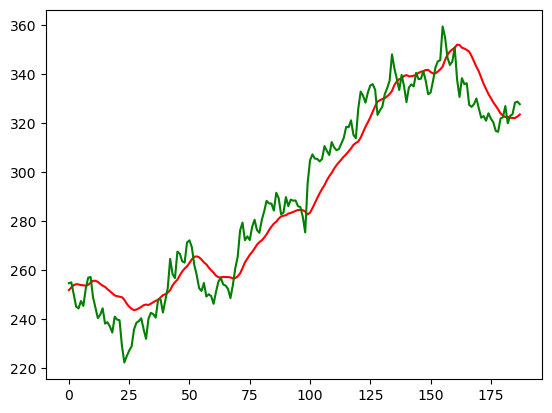

In [24]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()

